In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls data

holidays_events.csv    stores.csv             transactions.csv
oil.csv                test.csv
sample_submission.csv  train.csv


## training data

In [4]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
df_train.shape

(3000888, 6)

In [13]:
# check how many families

df_train.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [19]:
df_train.family.nunique()

33

In [14]:
# check one day

df_train[df_train.date == '2013-01-01']

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
1777,1777,2013-01-01,9,POULTRY,0.0,0
1778,1778,2013-01-01,9,PREPARED FOODS,0.0,0
1779,1779,2013-01-01,9,PRODUCE,0.0,0
1780,1780,2013-01-01,9,SCHOOL AND OFFICE SUPPLIES,0.0,0


In [20]:
df_train[df_train.date == '2013-01-01'].store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [21]:
df_train[(df_train.date == '2013-01-01') & (df_train.sales>0)]

,id,date,store_nbr,family,sales,onpromotion
563,563,2013-01-01,25,BEAUTY,2.000000,0
564,564,2013-01-01,25,BEVERAGES,810.000000,0
566,566,2013-01-01,25,BREAD/BAKERY,180.589000,0
568,568,2013-01-01,25,CLEANING,186.000000,0
569,569,2013-01-01,25,DAIRY,143.000000,0
570,570,2013-01-01,25,DELI,71.090000,0
571,571,2013-01-01,25,EGGS,46.000000,0
572,572,2013-01-01,25,FROZEN FOODS,29.654999,0
573,573,2013-01-01,25,GROCERY I,700.000000,0
574,574,2013-01-01,25,GROCERY II,15.000000,0


In [29]:
df_train.onpromotion.value_counts()

0      2389559
1       174551
2        79386
3        45862
4        31659
        ...   
313          1
452          1
642          1
305          1
425          1
Name: onpromotion, Length: 362, dtype: int64

In [45]:
df_case = df_train[(df_train.family == 'BEAUTY') & (df_train.store_nbr == 1)]
df_case

,id,date,store_nbr,family,sales,onpromotion
2,2,2013-01-01,1,BEAUTY,0.0,0
1784,1784,2013-01-02,1,BEAUTY,2.0,0
3566,3566,2013-01-03,1,BEAUTY,0.0,0
5348,5348,2013-01-04,1,BEAUTY,3.0,0
7130,7130,2013-01-05,1,BEAUTY,3.0,0
...,...,...,...,...,...,...
2991980,2991980,2017-08-11,1,BEAUTY,1.0,1
2993762,2993762,2017-08-12,1,BEAUTY,3.0,1
2995544,2995544,2017-08-13,1,BEAUTY,1.0,0
2997326,2997326,2017-08-14,1,BEAUTY,6.0,1


In [47]:
from prophet import Prophet

trend_series = pd.DataFrame()
trend_series['ds'] = pd.to_datetime(df_case['date'])
trend_series['y'] = df_case['sales']
trend_series

,ds,y
2,2013-01-01,0.0
1784,2013-01-02,2.0
3566,2013-01-03,0.0
5348,2013-01-04,3.0
7130,2013-01-05,3.0
...,...,...
2991980,2017-08-11,1.0
2993762,2017-08-12,3.0
2995544,2017-08-13,1.0
2997326,2017-08-14,6.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.9676
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       2402.11   0.000542968        78.148   6.059e-06       0.001      138  LS failed, Hessian reset 
      99       2402.15   2.31458e-05       71.4425      0.4952      0.7583      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       2402.15   6.30334e-08       67.0894      0.1927           1      195   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<Figure size 1296x432 with 0 Axes>

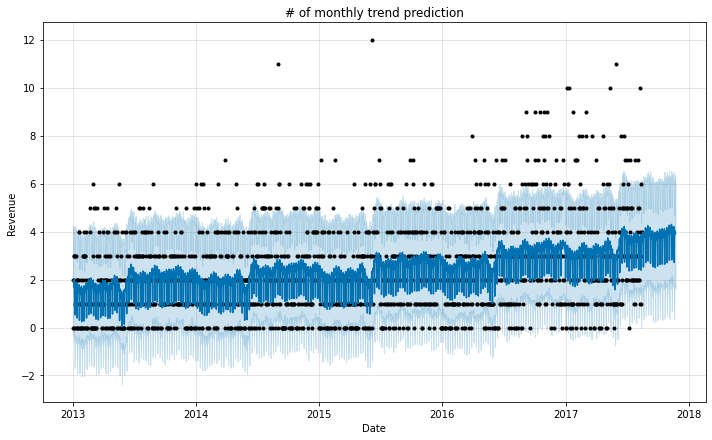

In [52]:
model = Prophet()
model.fit(trend_series)
        
time_forecast = model.make_future_dataframe(periods=100)
time_forecast = model.predict(time_forecast)

plt.figure(figsize=(18, 6))
model.plot(time_forecast, xlabel = 'Date', ylabel = 'Revenue')
plt.title('# of monthly trend prediction')
plt.show();

In [54]:
time_forecast[['ds','trend','yhat']]

,ds,trend,yhat
0,2013-01-01,1.704486,1.938328
1,2013-01-02,1.705177,1.951410
2,2013-01-03,1.705868,1.873305
3,2013-01-04,1.706559,1.678666
4,2013-01-05,1.707250,2.023786
...,...,...,...
1779,2017-11-19,3.641468,2.713518
1780,2017-11-20,3.643027,4.067432
1781,2017-11-21,3.644585,3.977784
1782,2017-11-22,3.646144,3.987820


## testing data

In [23]:
df_test = pd.read_csv('data/test.csv')
df_test.shape

(28512, 5)

In [25]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


## Other data

In [55]:
ls data

holidays_events.csv    stores.csv             transactions.csv
oil.csv                test.csv
sample_submission.csv  train.csv


In [56]:
df_he = pd.read_csv('data/holidays_events.csv')
df_he

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [57]:
df_stores = pd.read_csv('data/stores.csv')
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [59]:
df_trans = pd.read_csv('data/transactions.csv')
df_trans

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [60]:
df_oil = pd.read_csv('data/oil.csv')
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


## Merge tables

In [62]:
df_train.merge(df_he, on ='date', how='left')

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False


(3000888, 6)